# Predicting Life Expectancy in MSOAs – Building a Linear Regression Model

#### In this project, we will clean the data, conduct some exploratory data analysis and build a linear regression model. 

#### Aims
1. Build a linear regression model to predict life expectancy of MSOAs based on the following predictor variables:
   - Economic inactivity due to long-term sickness or disability
   - Net annual income before household costs
   - Index of Multiple Deprivation (IMD) scores
2. Predict how life expectancy in Birmingham will change following a 15% increase in net annual income before household costs.

**Importing the Required Libraries**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## DATA CLEANING

#### 1. Importing the Life Expectancy Data for Females

In [2]:
df = pd.read_excel('life_expectancy_data_1.xlsx', sheet_name = 'MSOA_females', 
                                                skiprows=7)

In [3]:
df.head()

,MSOA Codes,MSOA Names,Region,HLE (years),Unnamed: 4,Lower 95 % confidence interval,Upper 95 % confidence interval,LE (Years),Lower 95 % confidence interval.1,Upper 95 % confidence interval.1,Proportion1 of life spent in 'Good' health (%),HLE rank2,LE rank2,Proportion rank2
0,E02006397,Runnymede 005,South East,74.49511,*,73.09977,75.89046,84.27644,82.59300,85.95988,88.39375,59,2573,1
1,E02005976,South Oxfordshire 019,South East,74.01843,*,72.38887,75.64800,84.00915,82.15706,85.86125,88.10758,85,2831,2
2,E02006332,Elmbridge 016,South East,72.75453,*,71.30500,74.20406,82.72113,81.01227,84.43000,87.95157,236,4159,3
3,E02000791,Richmond upon Thames 008,London,74.70645,*,72.82715,76.58575,85.03054,82.80453,87.25655,87.85838,51,1903,4
4,E02005097,Sevenoaks 011,South East,73.58459,*,72.18431,74.98487,83.92962,82.30305,85.55620,87.67416,114,2929,5


#### 2. Filter for desired columns & rename column names

In [5]:
df_shortened = df[['MSOA Codes', 'MSOA Names', 'Region', 'LE (Years)']]
df_shortened

,MSOA Codes,MSOA Names,Region,LE (Years)
0,E02006397,Runnymede 005,South East,84.27644
1,E02005976,South Oxfordshire 019,South East,84.00915
2,E02006332,Elmbridge 016,South East,82.72113
3,E02000791,Richmond upon Thames 008,London,85.03054
4,E02005097,Sevenoaks 011,South East,83.92962
...,...,...,...,...
6781,E02001896,Birmingham 070,West Midlands,82.89957
6782,E02000884,Tower Hamlets 021,London,88.32880
6783,E02001903,Birmingham 077,West Midlands,77.67729
6784,E02001878,Birmingham 052,West Midlands,83.35279


In [6]:
column_names = ['MSOA code', 'MSOA name', 'Region name', 'Female Life Expectancy']
df_shortened.columns = column_names

In [7]:
df_shortened

,MSOA code,MSOA name,Region name,Female Life Expectancy
0,E02006397,Runnymede 005,South East,84.27644
1,E02005976,South Oxfordshire 019,South East,84.00915
2,E02006332,Elmbridge 016,South East,82.72113
3,E02000791,Richmond upon Thames 008,London,85.03054
4,E02005097,Sevenoaks 011,South East,83.92962
...,...,...,...,...
6781,E02001896,Birmingham 070,West Midlands,82.89957
6782,E02000884,Tower Hamlets 021,London,88.32880
6783,E02001903,Birmingham 077,West Midlands,77.67729
6784,E02001878,Birmingham 052,West Midlands,83.35279


#### 3. Importing the Life Expectancy Data for Males

In [8]:
df1 = pd.read_excel('life_expectancy_data_1.xlsx', sheet_name = 'MSOA_males', 
                                                skiprows=7)

In [9]:
df1.head()

,MSOA Codes,MSOA Names,Region,HLE (years),Unnamed: 4,Lower 95 % confidence interval,Upper 95 % confidence interval,LE (Years),Lower 95 % confidence interval.1,Upper 95 % confidence interval.1,Proportion1 of life spent in 'Good' health (%),HLE rank2,LE rank2,Proportion rank2
0,E02006397,Runnymede 005,South East,73.89350,*,72.17340,75.61361,81.95920,79.99702,83.92139,90.15888,35,1176,1
1,E02004926,St Albans 003,East of England,74.26234,*,72.92460,75.60009,82.54170,81.04001,84.04338,89.96949,22,804,2
2,E02000592,Kensington and Chelsea 016,London,78.92239,*,76.03350,81.81128,88.03009,85.05059,91.00960,89.65387,3,7,3
3,E02003862,Cheshire East 011,North West,71.83456,*,68.87421,74.79492,80.22812,76.84988,83.60636,89.53788,184,2674,4
4,E02004760,Hart 010,South East,73.16235,*,71.63444,74.69027,81.86242,80.12326,83.60157,89.37234,68,1236,5


#### 4. Filter for desired columns & rename column names

In [10]:
df1_shortened = df1[['MSOA Codes', 'MSOA Names', 'Region', 'LE (Years)']]
df1_shortened

,MSOA Codes,MSOA Names,Region,LE (Years)
0,E02006397,Runnymede 005,South East,81.95920
1,E02004926,St Albans 003,East of England,82.54170
2,E02000592,Kensington and Chelsea 016,London,88.03009
3,E02003862,Cheshire East 011,North West,80.22812
4,E02004760,Hart 010,South East,81.86242
...,...,...,...,...
6785,E02002640,Blackpool 008,North West,69.64877
6786,E02002639,Blackpool 007,North West,71.01822
6787,E02001897,Birmingham 071,West Midlands,74.07758
6788,E02001910,Birmingham 084,West Midlands,82.65349


In [11]:
column_names = ['MSOA code', 'MSOA name', 'Region name', 'Male Life Expectancy']
df1_shortened.columns = column_names

In [12]:
df1_shortened.head()

,MSOA code,MSOA name,Region name,Male Life Expectancy
0,E02006397,Runnymede 005,South East,81.95920
1,E02004926,St Albans 003,East of England,82.54170
2,E02000592,Kensington and Chelsea 016,London,88.03009
3,E02003862,Cheshire East 011,North West,80.22812
4,E02004760,Hart 010,South East,81.86242


#### 5. Merge the Life Expectancy Data

In [13]:
df_le = pd.merge(df_shortened, df1_shortened, on=['MSOA code', 'MSOA name'])
df_le

,MSOA code,MSOA name,Region name_x,Female Life Expectancy,Region name_y,Male Life Expectancy
0,E02006397,Runnymede 005,South East,84.27644,South East,81.95920
1,E02005976,South Oxfordshire 019,South East,84.00915,South East,82.51424
2,E02006332,Elmbridge 016,South East,82.72113,South East,80.47791
3,E02000791,Richmond upon Thames 008,London,85.03054,London,79.99692
4,E02005097,Sevenoaks 011,South East,83.92962,South East,83.06708
...,...,...,...,...,...,...
6780,E02001896,Birmingham 070,West Midlands,82.89957,West Midlands,77.08785
6781,E02000884,Tower Hamlets 021,London,88.32880,London,78.64924
6782,E02001903,Birmingham 077,West Midlands,77.67729,West Midlands,76.12842
6783,E02001878,Birmingham 052,West Midlands,83.35279,West Midlands,76.64902


**Drop one of the 'Region name' columns**

In [14]:
df2 = df_le.drop(columns = ['Region name_x'])
df2.head()

,MSOA code,MSOA name,Female Life Expectancy,Region name_y,Male Life Expectancy
0,E02006397,Runnymede 005,84.27644,South East,81.95920
1,E02005976,South Oxfordshire 019,84.00915,South East,82.51424
2,E02006332,Elmbridge 016,82.72113,South East,80.47791
3,E02000791,Richmond upon Thames 008,85.03054,London,79.99692
4,E02005097,Sevenoaks 011,83.92962,South East,83.06708


In [15]:
df2 = df2.rename(columns = {'Region name_y' : 'Region name'})
df2.head()

,MSOA code,MSOA name,Female Life Expectancy,Region name,Male Life Expectancy
0,E02006397,Runnymede 005,84.27644,South East,81.95920
1,E02005976,South Oxfordshire 019,84.00915,South East,82.51424
2,E02006332,Elmbridge 016,82.72113,South East,80.47791
3,E02000791,Richmond upon Thames 008,85.03054,London,79.99692
4,E02005097,Sevenoaks 011,83.92962,South East,83.06708


#### 6. Import 'Net annual income before housing costs' Excel worksheet
- I have not imported the first four lines of the worksheet as they do not contain any data. 

In [16]:
net_income_before_housing_costs = pd.read_excel('MSOA_income_estimates_1.xlsx', sheet_name = 'Net income before housing costs', 
                                                skiprows=4)

In [17]:
net_income_before_housing_costs.head()

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Net annual income before housing costs (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,28800,32200,25700,6500
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,30100,33800,26800,7000
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,31300,35100,27900,7200
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,27600,30900,24600,6300
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,26500,29600,23600,6000


#### 4. Merge the Life Expectancy and Income Dataframes

In [18]:
df3 = pd.merge(df2, net_income_before_housing_costs, on=['MSOA code', 'MSOA name'])
df3

,MSOA code,MSOA name,Female Life Expectancy,Region name_x,Male Life Expectancy,Local authority code,Local authority name,Region code,Region name_y,Net annual income before housing costs (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,E02006397,Runnymede 005,84.27644,South East,81.95920,E07000212,Runnymede,E12000008,South East,51600,58100,45700,12400
1,E02005976,South Oxfordshire 019,84.00915,South East,82.51424,E07000179,South Oxfordshire,E12000008,South East,46100,51900,41000,10900
2,E02006332,Elmbridge 016,82.72113,South East,80.47791,E07000207,Elmbridge,E12000008,South East,53300,60300,47100,13200
3,E02000791,Richmond upon Thames 008,85.03054,London,79.99692,E09000027,Richmond upon Thames,E12000007,London,54400,61300,48200,13100
4,E02005097,Sevenoaks 011,83.92962,South East,83.06708,E07000111,Sevenoaks,E12000008,South East,49000,55500,43200,12300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6780,E02001896,Birmingham 070,82.89957,West Midlands,77.08785,E08000025,Birmingham,E12000005,West Midla,22100,25100,19400,5700
6781,E02000884,Tower Hamlets 021,88.32880,London,78.64924,E09000030,Tower Hamlets,E12000007,London,37300,42600,32600,10000
6782,E02001903,Birmingham 077,77.67729,West Midlands,76.12842,E08000025,Birmingham,E12000005,West Midla,21600,24500,19000,5500
6783,E02001878,Birmingham 052,83.35279,West Midlands,76.64902,E08000025,Birmingham,E12000005,West Midla,22000,24900,19500,5400


#### 5. Import IMD Scores Data

In [19]:
df_imd = pd.read_csv('imd2019_msoa_level_data_1.csv')

In [20]:
df_imd.head()

,MSOAC,MSOAHOCLN,LAD19C,LAD19N,REG,LSOACOUNT,POPMID15,IMD19 SCORE,MSOARANK,MSOADECILE,MSOAQUINTILE
0,E02000001,City of London,E09000001,City of London,London,6,6687,14.720484,4198,7,4
1,E02000002,Marks Gate,E09000002,Barking and Dagenham,London,4,7379,34.767560,1060,2,1
2,E02000003,Chadwell Heath East,E09000002,Barking and Dagenham,London,6,10720,25.149726,2200,4,2
3,E02000004,Eastbrookend,E09000002,Barking and Dagenham,London,4,6536,23.560044,2429,4,2
4,E02000005,Becontree Heath,E09000002,Barking and Dagenham,London,5,9243,30.212965,1519,3,2


In [21]:
df_imd_new = df_imd[['MSOAC', 'IMD19 SCORE', 'POPMID15','MSOARANK', 'MSOADECILE', 'MSOAQUINTILE']]
df_imd_new.rename(columns={'MSOAC':'MSOA code', 'IMD19 SCORE': 'IMD SCORE'}, inplace = True)

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_25787/1724207105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imd_new.rename(columns={'MSOAC':'MSOA code', 'IMD19 SCORE': 'IMD SCORE'}, inplace = True)


#### 6. Merge IMD Data with df2

In [22]:
df4 = pd.merge(df3, df_imd_new, on=['MSOA code'])

In [23]:
df4.head()

,MSOA code,MSOA name,Female Life Expectancy,Region name_x,Male Life Expectancy,Local authority code,Local authority name,Region code,Region name_y,Net annual income before housing costs (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),IMD SCORE,POPMID15,MSOARANK,MSOADECILE,MSOAQUINTILE
0,E02006397,Runnymede 005,84.27644,South East,81.95920,E07000212,Runnymede,E12000008,South East,51600,58100,45700,12400,5.761020,6267,6530,10,5
1,E02005976,South Oxfordshire 019,84.00915,South East,82.51424,E07000179,South Oxfordshire,E12000008,South East,46100,51900,41000,10900,7.697252,6138,6129,10,5
2,E02006332,Elmbridge 016,82.72113,South East,80.47791,E07000207,Elmbridge,E12000008,South East,53300,60300,47100,13200,7.616327,6364,6139,10,5
3,E02000791,Richmond upon Thames 008,85.03054,London,79.99692,E09000027,Richmond upon Thames,E12000007,London,54400,61300,48200,13100,5.957179,6508,6492,10,5
4,E02005097,Sevenoaks 011,83.92962,South East,83.06708,E07000111,Sevenoaks,E12000008,South East,49000,55500,43200,12300,4.937463,9769,6645,10,5


#### 7. Import NOMIS Employment Data

In [24]:
df_nomis = pd.read_csv('nomis_1.csv')

In [25]:
df_nomis.head()

,date,geography,geography code,Economic Activity: All usual residents aged 16 to 74; measures: Value,Economic Activity: Economically active; measures: Value,Economic Activity: Economically active: In employment; measures: Value,Economic Activity: Economically active: Employee: Part-time; measures: Value,Economic Activity: Economically active: Employee: Full-time; measures: Value,Economic Activity: Economically active: Self-employed; measures: Value,Economic Activity: Economically active: Unemployed; measures: Value,...,Economic Activity: Economically Inactive; measures: Value,Economic Activity: Economically inactive: Retired; measures: Value,Economic Activity: Economically inactive: Student (including full-time students); measures: Value,Economic Activity: Economically inactive: Looking after home or family; measures: Value,Economic Activity: Economically inactive: Long-term sick or disabled; measures: Value,Economic Activity: Economically inactive: Other; measures: Value,Economic Activity: Unemployed: Age 16 to 24; measures: Value,Economic Activity: Unemployed: Age 50 to 74; measures: Value,Economic Activity: Unemployed: Never worked; measures: Value,Economic Activity: Long-term unemployed; measures: Value
0,2011,Darlington 001,E02002559,6521,4928,4609,927,2888,794,165,...,1593,967,211,209,133,73,40,43,16,66
1,2011,Darlington 002,E02002560,4462,3323,3006,731,1957,318,181,...,1139,701,141,137,119,41,44,33,21,68
2,2011,Darlington 003,E02002561,4342,3093,2816,706,1856,254,171,...,1249,796,143,120,151,39,32,47,14,61
3,2011,Darlington 004,E02002562,4473,3139,2672,726,1722,224,331,...,1334,623,138,188,275,110,91,62,44,168
4,2011,Darlington 005,E02002563,3912,2620,2366,640,1507,219,168,...,1292,711,130,152,230,69,56,36,26,64


**a) Rename df_nomis column names to match df4, shorten df_nomis**

In [26]:
df_nomis_changed = df_nomis.rename(columns={
    'geography': 'MSOA name',
    'geography code': 'MSOA code',
    'Economic Activity: Economically inactive: Long-term sick or disabled; measures: Value':
    'Economically inactive: Long-term sick or disabled'
})

In [27]:
df_nomis_shortened = df_nomis_changed[['MSOA name', 'MSOA code','Economically inactive: Long-term sick or disabled']]

In [28]:
df_nomis_shortened

,MSOA name,MSOA code,Economically inactive: Long-term sick or disabled
0,Darlington 001,E02002559,133
1,Darlington 002,E02002560,119
2,Darlington 003,E02002561,151
3,Darlington 004,E02002562,275
4,Darlington 005,E02002563,230
...,...,...,...
7196,Newport 016,W02000362,173
7197,Newport 017,W02000363,244
7198,Newport 018,W02000364,476
7199,Newport 019,W02000365,418


#### 8. Merge df_nomis_shortened with df4

In [29]:
df5 = pd.merge(df4, df_nomis_shortened, on=['MSOA code', 'MSOA name'])

In [30]:
df5.head()

,MSOA code,MSOA name,Female Life Expectancy,Region name_x,Male Life Expectancy,Local authority code,Local authority name,Region code,Region name_y,Net annual income before housing costs (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),IMD SCORE,POPMID15,MSOARANK,MSOADECILE,MSOAQUINTILE,Economically inactive: Long-term sick or disabled
0,E02006397,Runnymede 005,84.27644,South East,81.95920,E07000212,Runnymede,E12000008,South East,51600,58100,45700,12400,5.761020,6267,6530,10,5,44
1,E02005976,South Oxfordshire 019,84.00915,South East,82.51424,E07000179,South Oxfordshire,E12000008,South East,46100,51900,41000,10900,7.697252,6138,6129,10,5,37
2,E02006332,Elmbridge 016,82.72113,South East,80.47791,E07000207,Elmbridge,E12000008,South East,53300,60300,47100,13200,7.616327,6364,6139,10,5,41
3,E02000791,Richmond upon Thames 008,85.03054,London,79.99692,E09000027,Richmond upon Thames,E12000007,London,54400,61300,48200,13100,5.957179,6508,6492,10,5,41
4,E02005097,Sevenoaks 011,83.92962,South East,83.06708,E07000111,Sevenoaks,E12000008,South East,49000,55500,43200,12300,4.937463,9769,6645,10,5,74


#### 9. Add a Column for Average Life Expectancy

As the 'Male Life Expectancy' and 'Female Life Expectancy' columns are objects, I must convert them into floats before I can calculate the average life expectancy.

In [31]:
df5['Average Life Expectancy'] = (df4['Male Life Expectancy'].astype(float) + 
                                     df4['Female Life Expectancy'].astype(float)) / 2

#### 10. Drop Null Values & Filter for Selected Columns

In [32]:
df6 = df5.dropna()

In [34]:
df7 = df6[['MSOA code', 'MSOA name', 'Region name_x',
       'Net annual income before housing costs (£)',
       'IMD SCORE','Economically inactive: Long-term sick or disabled',
       'Average Life Expectancy']]

In [38]:
df7 = df7.rename(columns = {'Region name_x' : 'Region name'})

#### 11. Drop Duplicates

In [39]:
final_df = df7.drop_duplicates()

In [40]:
final_df.head()

,MSOA code,MSOA name,Region name,Net annual income before housing costs (£),IMD SCORE,Economically inactive: Long-term sick or disabled,Average Life Expectancy
0,E02006397,Runnymede 005,South East,51600,5.761020,44,83.117820
1,E02005976,South Oxfordshire 019,South East,46100,7.697252,37,83.261695
2,E02006332,Elmbridge 016,South East,53300,7.616327,41,81.599520
3,E02000791,Richmond upon Thames 008,London,54400,5.957179,41,82.513730
4,E02005097,Sevenoaks 011,South East,49000,4.937463,74,83.498350


## EXPLORATORY DATA ANALYSIS

#### 1. Summary Statistics

In [41]:
final_df.describe().round(1)

,Net annual income before housing costs (£),IMD SCORE,Economically inactive: Long-term sick or disabled,Average Life Expectancy
count,6785.0,6785.0,6785.0,6785.0
mean,32790.0,21.6,231.9,81.3
std,5833.0,13.2,137.7,2.7
min,16700.0,2.2,14.0,71.4
25%,28900.0,11.5,128.0,79.6
50%,32200.0,18.2,200.0,81.5
75%,36100.0,28.7,302.0,83.2
max,67000.0,86.9,1080.0,91.4


#### 2. Distribution of Average Life Expectancy

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_25787/2088677457.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['Average Life Expectancy'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Life Expectancy')

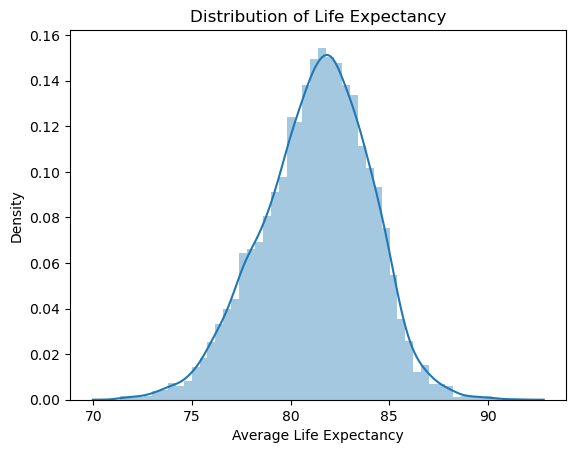

In [42]:
sns.distplot(final_df['Average Life Expectancy'])   
plt.title('Distribution of Life Expectancy')

#### 3. Distribution of IMD scores per Region

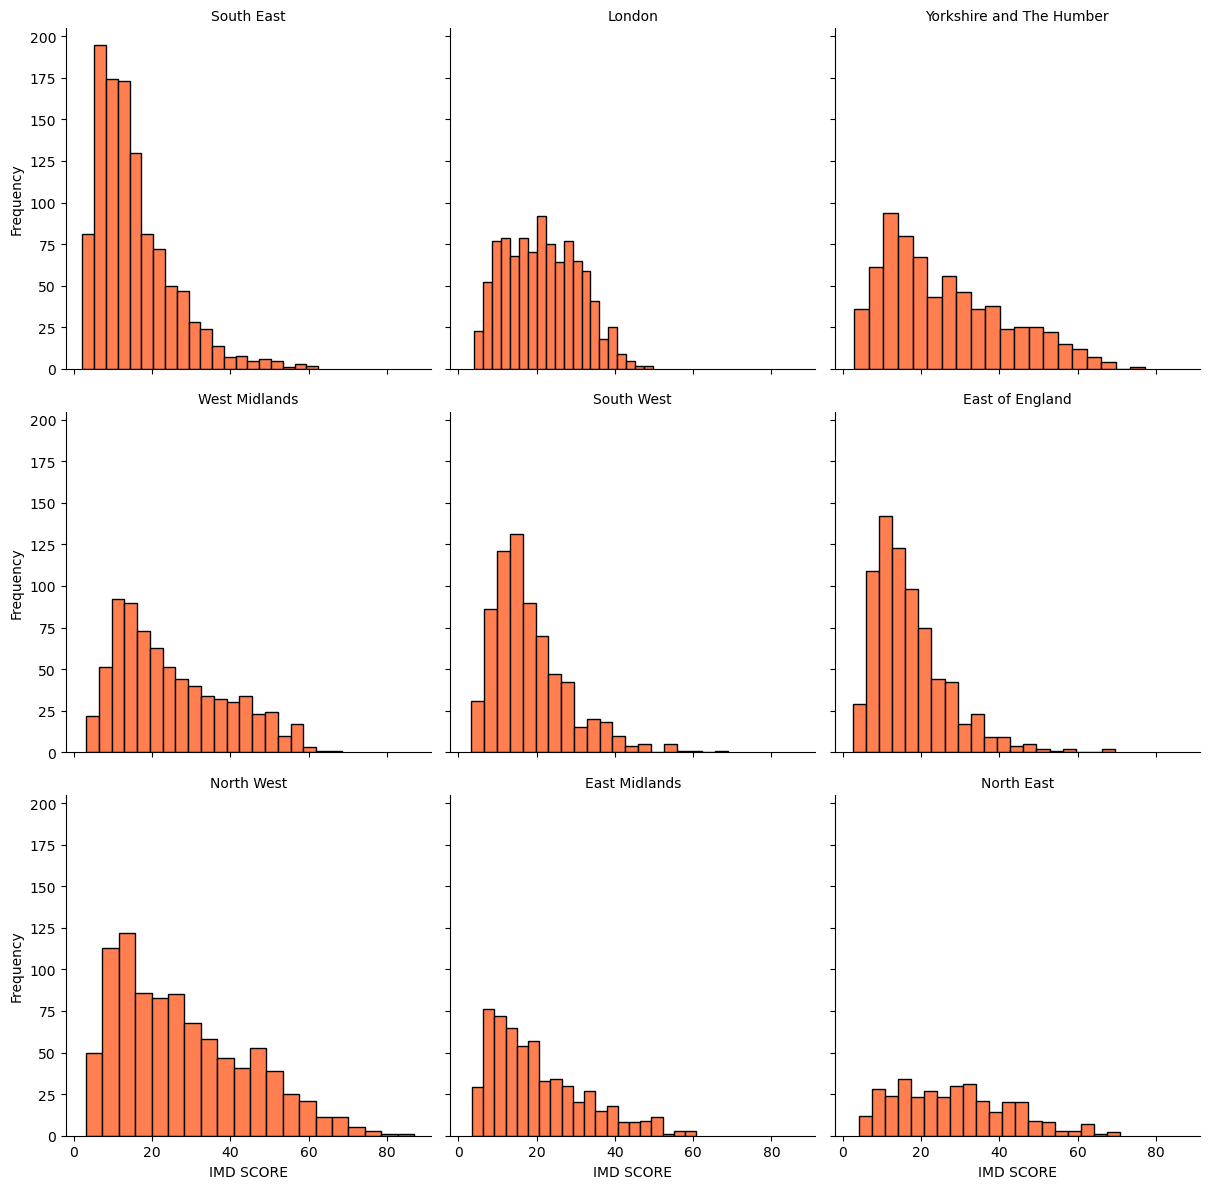

<Figure size 640x480 with 0 Axes>

In [43]:
z = sns.FacetGrid(final_df, col='Region name', col_wrap=3, height=4)
z.map(plt.hist, 'IMD SCORE', bins=20, edgecolor='black', color='coral')
z.set_titles('{col_name}')
z.set_axis_labels('IMD SCORE', 'Frequency')
plt.show()

plt.subplots_adjust(hspace=0.5) 

#### 4. Scatter Plots Showing The Relationship Between The Predictor Variables and Life Expectancy

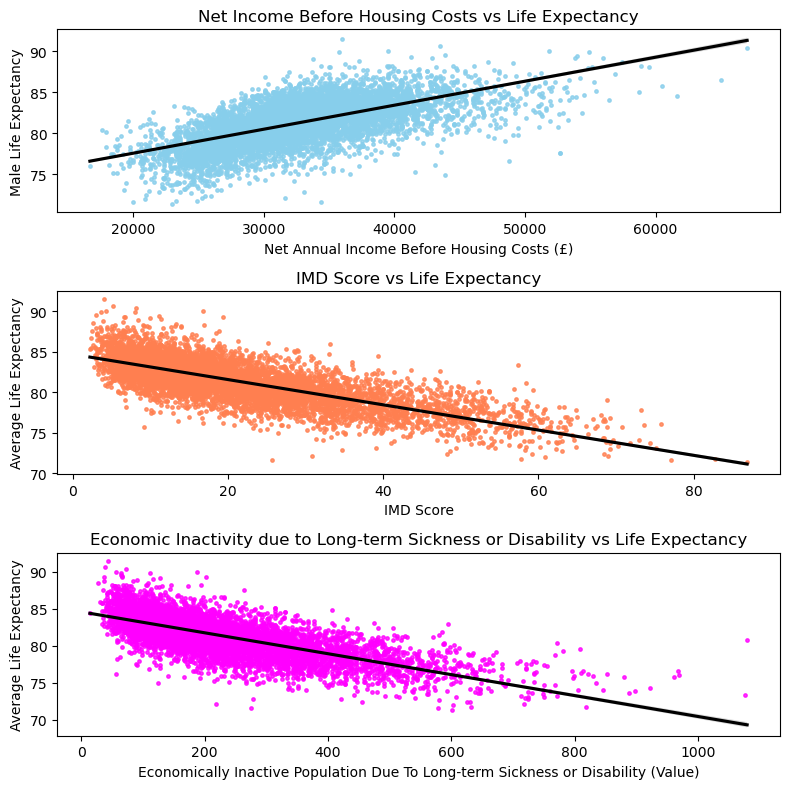

In [44]:
fig,axes = plt.subplots(nrows=3,figsize=(8,8))

# Net annual income before housing costs
sns.regplot(x='Net annual income before housing costs (£)', y='Average Life Expectancy',
            data=final_df, ax=axes[0], scatter_kws={'color': 'skyblue', 's': 6}, line_kws={'color': 'black'})
axes[0].set_xlabel('Net Annual Income Before Housing Costs (£)')
axes[0].set_ylabel('Male Life Expectancy')
axes[0].set_title('Net Income Before Housing Costs vs Life Expectancy',fontsize=12)

#IMD score
sns.regplot(x='IMD SCORE', y='Average Life Expectancy',
            data=final_df, ax=axes[1], scatter_kws={'color': '#FF7F50','s': 6}, line_kws={'color': 'black'})
axes[1].set_xlabel('IMD Score')
axes[1].set_ylabel('Average Life Expectancy')
axes[1].set_title('IMD Score vs Life Expectancy',fontsize=12)

#'Economically inactive: Long-term sick or disabled'
sns.regplot(x='Economically inactive: Long-term sick or disabled', y='Average Life Expectancy',
            data=final_df, ax=axes[2], scatter_kws={'color': 'magenta','s': 6}, line_kws={'color': 'black'})
axes[2].set_xlabel('Economically Inactive Population Due To Long-term Sickness or Disability (Value)')
axes[2].set_ylabel('Average Life Expectancy')
axes[2].set_title('Economic Inactivity due to Long-term Sickness or Disability vs Life Expectancy',fontsize=12)

plt.tight_layout()

#### 5. Box Plots to Show Net Annual Income Before Housing Costs Per Region

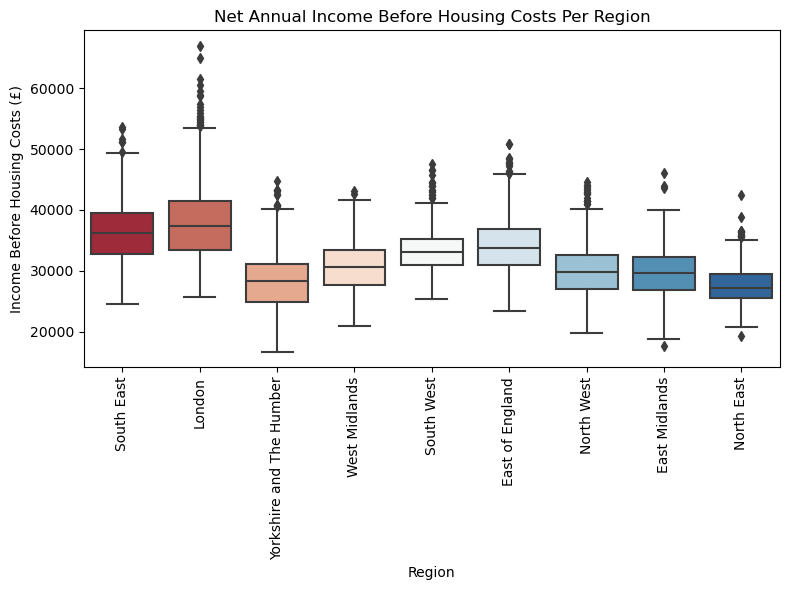

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region name', y='Net annual income before housing costs (£)', data=final_df, palette='RdBu')

plt.title('Net Annual Income Before Housing Costs Per Region')
plt.xlabel('Region')
plt.ylabel('Income Before Housing Costs (£)')
plt.xticks(rotation=90)  

plt.tight_layout()

### PHASE 1 - Building a Linear Regression Model

#### 1. Split the Data

 We need to split the data into an:
   - X array (which contains the features to train on, the predictor variables) &
   - y-array (which contains the target variable, in this case the life expectancy which we are trying to predict). 

In [46]:
X = final_df[['Net annual income before housing costs (£)', 'IMD SCORE',
              'Economically inactive: Long-term sick or disabled']]
y = final_df['Average Life Expectancy']

#### 2. Do a Train, Test Split
   - We want to split the data into a training set for the model and a testing set in order to test the model once it has been trained.
   - To do this, we need skicit learn (specifically the train_test_split function)

**a) Import train_test_split**

In [47]:
from sklearn.model_selection import train_test_split

**b) Set test_size to 0.4**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#### 3. Create and Train the Model

**a) Import the linear regression module** 

In [49]:
from sklearn.linear_model import LinearRegression

**b) Make an instance of the linear regression model**

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression()

#### 4. Evaluate Model Using Regression Coefficients

In [52]:
print(model.intercept_)

81.51388027402942


In [53]:
coefficients = model.coef_    
coefficients

array([ 8.59519882e-05, -8.44327747e-02, -5.03762524e-03])

In [54]:
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Net annual income before housing costs (£),0.000086
IMD SCORE,-0.084433
Economically inactive: Long-term sick or disabled,-0.005038


#### 4. Predictions

**a) Make the Predictions**

In [55]:
predictions = model.predict(X_test)
predictions  

array([82.16651226, 82.38234765, 79.63982059, ..., 81.26127483,
       79.86551605, 82.69411472])

**b) Scatter Plot to show Predictions vs Actual Values**

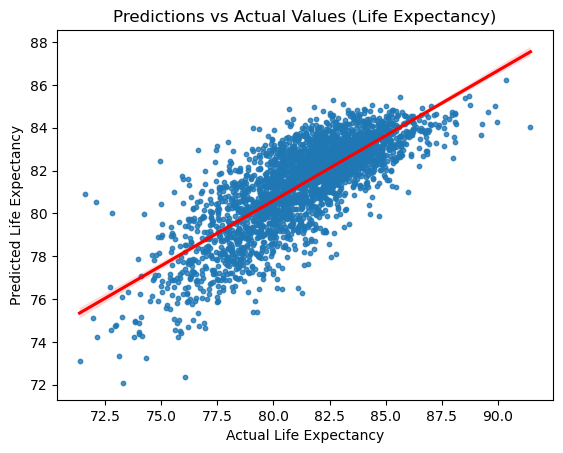

In [56]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Predictions vs Actual Values (Life Expectancy)')
plt.show()

**c) Histogram of Residuals**

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_25787/4009002029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Residuals')

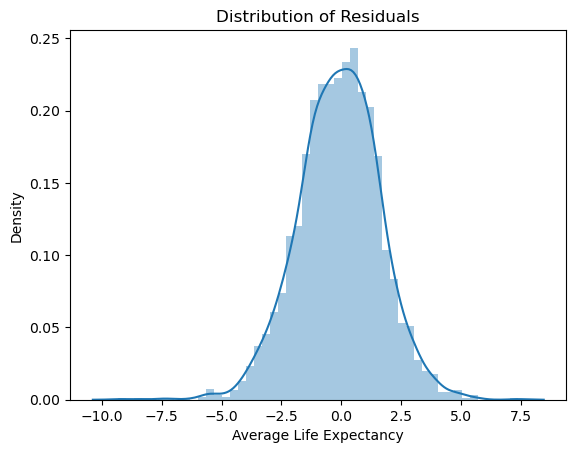

In [57]:
sns.distplot((y_test-predictions))
plt.title('Distribution of Residuals')

**Insights:** The residuals are normally distributed which shows the model is suitable for this data.

#### 4. Evaluate the Model using R-Squared

In [58]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

R-squared: 0.6025889549353842


#### 5. Find The Most Significant Variable

To identify the most significant variable, we will refit the linear regression model multiple times, each time excluding one of the three variables. For each model, we will calculate the R-squared value.

In [59]:
X1 = final_df[['IMD SCORE','Economically inactive: Long-term sick or disabled']]
X2 = final_df[['Net annual income before housing costs (£)','Economically inactive: Long-term sick or disabled']]
X3 = final_df[['Net annual income before housing costs (£)', 'IMD SCORE']]
y1 = final_df['Average Life Expectancy']

In [60]:
def find_r_squared(X_data,y_data):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r_squared = r2_score(y_test, predictions)
    return r_squared

In [61]:
r_squared_values = [find_r_squared(X1, y1), find_r_squared(X2, y1), find_r_squared(X3, y1)]
r_squared_values

[0.5844240380547935, 0.5581464862730043, 0.5921605765345861]

In [62]:
r_squared_df = pd.DataFrame({'Variable Removed From Model': X.columns,'R-Squared Values': r_squared_values})
r_squared_df

,Variable Removed From Model,R-Squared Values
0,Net annual income before housing costs (£),0.584424
1,IMD SCORE,0.558146
2,Economically inactive: Long-term sick or disabled,0.592161


**Analysis:** The model with 'IMD score' removed has the lowest r-squared value. 

### PHASE 2 - Birmingham

#### 1. Filter final_df for MSOAs in Birmingham

In [63]:
def get_birmingham_places(dfx):
    birmingham_places = dfx[dfx['MSOA name'].str.startswith('Birmingham')]
    return birmingham_places

In [64]:
birmingham_df = get_birmingham_places(final_df)
birmingham_df.head()

,MSOA code,MSOA name,Region name,Net annual income before housing costs (£),IMD SCORE,Economically inactive: Long-term sick or disabled,Average Life Expectancy
319,E02001830,Birmingham 004,West Midlands,40700,8.740284,93,84.186110
590,E02001829,Birmingham 003,West Midlands,39700,5.984081,102,84.924010
664,E02001841,Birmingham 015,West Midlands,40200,7.957627,78,84.405725
726,E02001835,Birmingham 009,West Midlands,36500,16.015930,184,80.975935
1067,E02001838,Birmingham 012,West Midlands,38200,9.549323,104,82.390020


#### 2. Filter birmingham_df For Desired Columns

In [65]:
mini_birmingham_df = birmingham_df[['Net annual income before housing costs (£)', 'IMD SCORE', 
                            'Economically inactive: Long-term sick or disabled']]
mini_birmingham_df.head()

,Net annual income before housing costs (£),IMD SCORE,Economically inactive: Long-term sick or disabled
319,40700,8.740284,93
590,39700,5.984081,102
664,40200,7.957627,78
726,36500,16.015930,184
1067,38200,9.549323,104


#### 3. Multiply 'Net annual income before housing costs (£)' Column By 1.15 (to show the 15% increase in income)

In [66]:
mini_birmingham_df['Net annual income before housing costs (£)'] = mini_birmingham_df['Net annual income before housing costs (£)']*1.15

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_25787/3997036786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_birmingham_df['Net annual income before housing costs (£)'] = mini_birmingham_df['Net annual income before housing costs (£)']*1.15


In [67]:
mini_birmingham_df.head()

,Net annual income before housing costs (£),IMD SCORE,Economically inactive: Long-term sick or disabled
319,46805.0,8.740284,93
590,45655.0,5.984081,102
664,46230.0,7.957627,78
726,41975.0,16.015930,184
1067,43930.0,9.549323,104


#### 4. Pass mini_birmingham_df Into Model

In [68]:
model.predict(mini_birmingham_df)

array([84.33039752, 84.41892794, 84.42262141, 82.84252252, 83.95956226,
       83.69251706, 82.95019613, 83.38838901, 83.4835032 , 83.67091698,
       83.06501021, 82.043815  , 83.29279006, 81.35156436, 82.23903072,
       83.35782051, 81.21587311, 81.14136988, 82.55210108, 82.34094069,
       81.34414316, 81.2268861 , 82.66721643, 82.2042294 , 80.47781493,
       81.63110838, 81.5710226 , 81.94266271, 80.75690034, 81.2451816 ,
       81.28706502, 81.52042052, 79.33912894, 81.40352661, 81.63645062,
       81.03042947, 80.03493035, 82.16448597, 80.06149933, 81.21420937,
       79.98560805, 80.87027322, 83.21777661, 79.70318412, 81.69788148,
       79.61344908, 81.31039999, 80.58537345, 80.56483642, 78.76731132,
       79.34154209, 79.90509824, 80.37800499, 81.01988294, 81.77118618,
       79.70032433, 81.7520316 , 80.47750345, 82.14028039, 78.82265372,
       80.27580748, 79.43066553, 80.94131568, 79.95913596, 78.97435957,
       79.28718349, 78.61559814, 78.8024299 , 80.343159  , 80.74